In [1]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt

In [5]:
ipath = 'D:/vitaldb/first_filtered/ORC2_210901_083612.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
0,0.000000,0.000000,0.100001,50.036629,20.799999,,,,,,...,,,,,,,,,,
1,1.000000,-1.371000,0.090001,37.118439,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
2,2.000000,0.000000,0.025001,55.482296,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
3,3.000000,0.000000,0.500001,55.824177,20.700001,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
4,4.000000,0.000000,0.015001,26.153847,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8984,8984.000000,-0.399000,,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
8985,8985.000000,1.347000,,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
8986,8986.000000,1.776000,,0.000000,,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
8987,8987.000000,5.395000,,,,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,


In [6]:
df.head() 

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
0,0.000000,0.000000,0.100001,50.036629,20.799999,,,,,,...,,,,,,,,,,
1,1.000000,-1.371000,0.090001,37.118439,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
2,2.000000,0.000000,0.025001,55.482296,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
3,3.000000,0.000000,0.500001,55.824177,20.700001,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,
4,4.000000,0.000000,0.015001,26.153847,20.799999,2.083333,2.083333,2.083333,2.083333,0.000000,...,,,,,,,,,,


In [7]:
# df.shape
df.loc[:300, 'PPG']

KeyError: 'PPG'

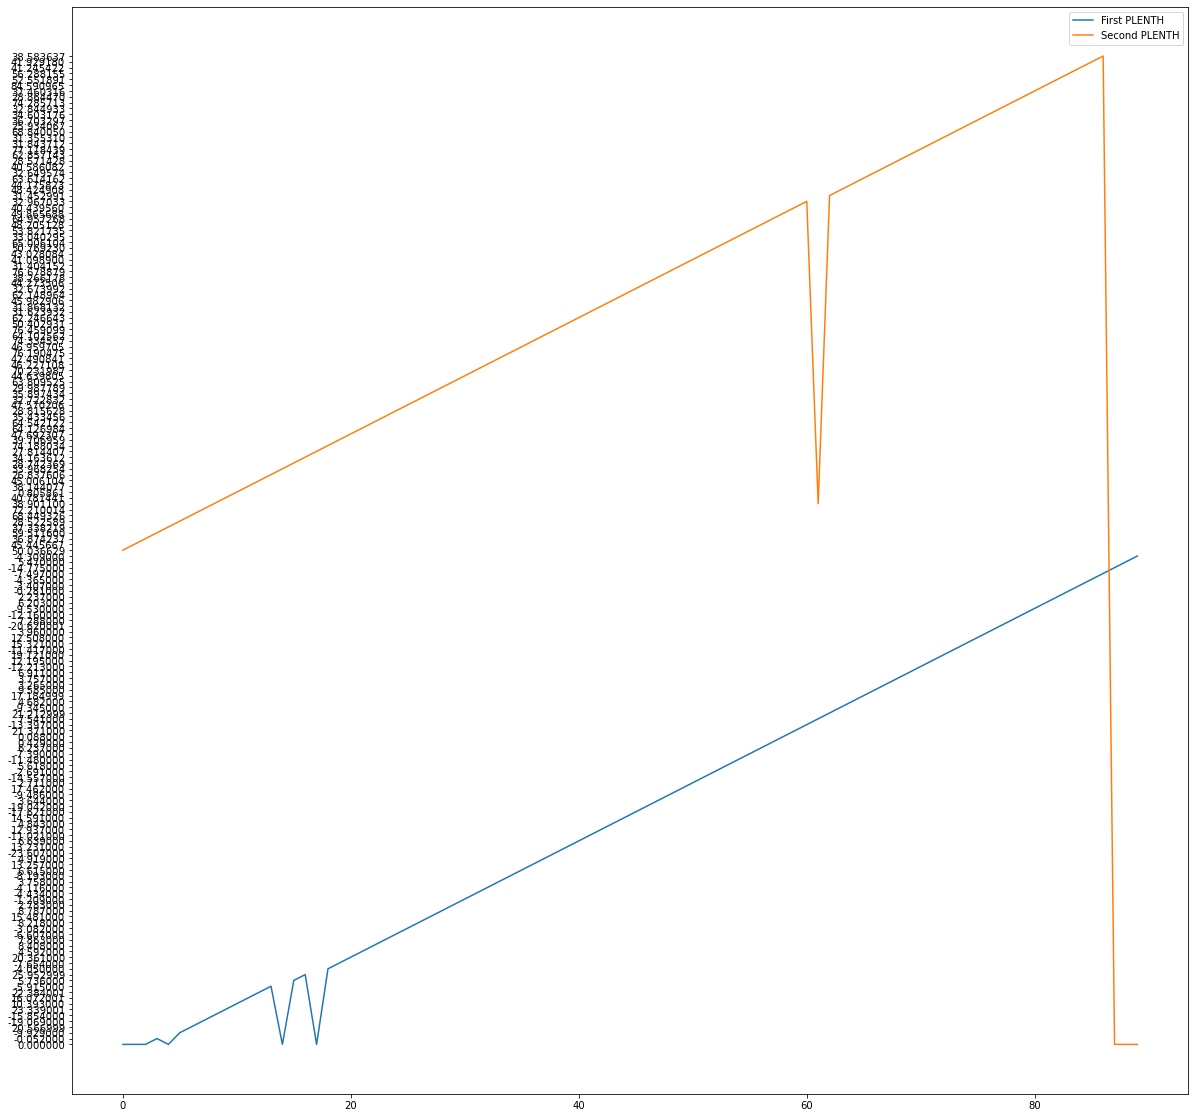

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df.iloc[:, 1], label='First PLENTH')
plt.plot(df.iloc[:, 3], label='Second PLENTH')
plt.legend()
plt.show()

<AxesSubplot:>

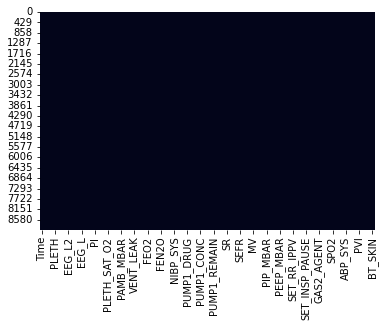

In [3]:
# df.isnull()
import seaborn as sns 

sns.heatmap(df.isnull(), cbar=False)

In [41]:
df[df['ECG_II'] == ''], df[df['CO2'] == '']

(             Time       PLETH ECG_II     PLETH        CO2      EEG_L1  \
 490    490.000000   -9.495000                    1.200000  -31.250000   
 4092  4092.000000  -10.176000                   36.099998   10.416667   
 7694  7694.000000   -7.336000                   31.500000  -14.583333   
 8700  8700.000000  -14.775000         0.000000   0.000000    2.083333   
 8701  8701.000000   32.768002         0.000000   0.000000    2.083333   
 ...           ...         ...    ...       ...        ...         ...   
 8984  8984.000000   -0.399000         0.000000   0.000000    2.083333   
 8985  8985.000000    1.347000         0.000000   0.000000    2.083333   
 8986  8986.000000    1.776000         0.000000               2.083333   
 8987  8987.000000    5.395000                                2.083333   
 8988  8988.000000    3.708000                                           
 
           EEG_L2      EEG_R1      EEG_R2       EEG_L  ...        SPO2  \
 490   -35.416668  -22.916666  -43.7

In [21]:
type(df.loc[0, 'Time'])

numpy.float64

In [24]:
df = df.fillna(0)

In [41]:
# pd.save_csv(df)
# df.save
df.to_csv('test.csv')

In [45]:
# rootdir = r"//Vitalnew/vital_data/Monthly_Confirmed/SNUH_OR"
rootdir = r'D:/first_filtered/'

for dir, dirs, files in os.walk(rootdir):
    
    for file in files[:10]:
        ipath = '{}/{}'.format(dir, file)
        cmd = 'vital_trks {}'.format(ipath)
        p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
        df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')

        devs = []
        for index, row in df.iterrows():
            if row['tname'] != 'SVV':
                continue

            devs.append(row['dname'])


        if not devs:
            continue
        
        if type(devs) == 'float':
            print(devs)
        # print(devs)
        # print('{},{}'.format(ipath[len(rootdir)+1:], ','.join(devs)))

In [18]:
# devs
df.describe()

,Time,PLETH,ECG_II,PLETH,CO2,EEG_L1,EEG_L2,EEG_R1,EEG_R2,EEG_L,...,SPO2,BPM,ABP,ABP_SYS,ABP_DIA,HR,PVI,SET_FLOW_TRIG,PPV,BT_SKIN
count,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989,...,8989,8989,8989,8989,8989,8989,8989,8989,8989,8989
unique,8989,7608,336,2322,421,124,160,159,140,86,...,7,44,1142,57,47,64,31,2,21,197
top,0.000000,0.000000,-0.044999,0.000000,0.000000,2.083333,2.083333,2.083333,2.083333,0.000000,...,99.000000,,,,,,,,,
freq,1,612,350,270,745,1490,1192,1490,1190,1716,...,5517,1119,732,1410,1410,1435,1544,7128,2124,4302
